In [1]:
import numpy as np
import random
np.random.seed(42)
x = np.random.rand(100,1) # rand gives uniform distribution while randn gives normal distribution
y = 1 + 2*x + .1 * np.random.randn(100,1)  # a= 1, b= 2, and added noise

In [2]:
# Shuffling the index
idx = np.arange(100)
np.random.shuffle(idx)

# split index into 80,20
train_idx = idx[:80]
val_idx = idx[80:]

# generate train and test sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]



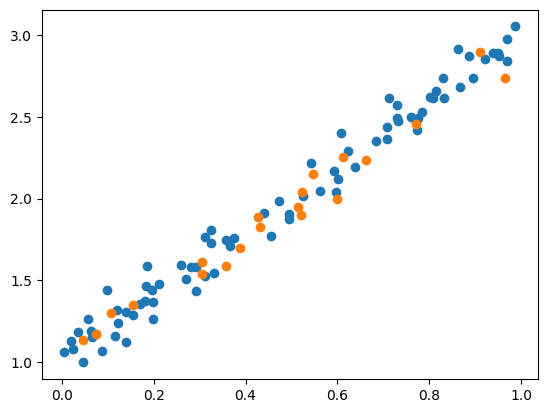

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)

In [4]:
# First we are performing simple regression using NumPy and then only through Pytorch(then only we'll know how much our life gets easier through Pytorch)
np.random.seed(42)
a = np.random.rand(1)
b = np.random.rand(1)

print(a,b)

lr = 1e-1 # learning rate
n_epochs = 1000 # no of epochs

for epoch in range(n_epochs):
  # calculate y and error
  y_hat = a + b * x_train  # y = a+bx
  error = y_train - y_hat

  # calculate MSE because it is a regression problem
  loss = (error ** 2).mean()

  # get gradient
  a_grad = -2 * error.mean() # we derive that a' = -2 * (y - y_hat)
  b_grad = -2 * (x_train * error).mean()    # b' = -2 * (x *(y-y_hat))

  # update the parameters
  a = a - lr * a_grad
  b = b - lr * b_grad

print('\nFrom gradients')
print(a,b)


# Just to check

from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train, y_train)
print('\nFrom Scikit-learn')
print(lnr.intercept_, lnr.coef_[0])


[0.37454012] [0.95071431]

From gradients
[1.02354082] [1.96896434]

From Scikit-learn
[1.02354075] [1.96896447]


In [5]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=d163b065b64d71e79e1d0fe577cf9253410706d4160b392de7e491b6c89ca4e4
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [6]:
# A tensor has three dimension. However, nowadays to keep simple, everything including vector and matrix is tensor. So either it's scaler or tensor

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# our dataset is in numpy, so we need to convert into pytoch tensor
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

# numpy cannot handle gpu tensors, so before converting tensor to numpy, you need to make then CPU tensors

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [7]:
# if we need gradients of our parameters, we can just do requires_grad = True
a = torch.randn(1, requires_grad = True, dtype = torch.float)
b = torch.randn(1, requires_grad = True, dtype = torch.float)
print(a,b)

# to run in gpu
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a,b)
# Sorry, but NO! The to(device) "shadows" the gradient...

# we can create regular tensors and send them to the device
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-0.1619], requires_grad=True) tensor([-2.4069], requires_grad=True)
tensor([-0.0177], requires_grad=True) tensor([-1.6194], requires_grad=True)
tensor([1.4216], device='cuda:0', requires_grad=True) tensor([-0.4842], device='cuda:0', requires_grad=True)


In [8]:
# it is much better to assign tensors to a device at the moment of their creation
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [9]:
# zeroing in the pytorch is done in order to zero out the previous gradient, such that the previous mini-batch gradient doesn't affect, in any way around, to the next gradient.
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)

a = torch.randn(1, requires_grad= True, dtype = torch.float, device = device)

b = torch.randn(1, requires_grad= True, dtype = torch.float, device = device)


for epoch in range(n_epochs):
  yhat = a + b * x_train_tensor
  error = y_train_tensor - yhat
  loss = (error ** 2).mean()

  # pytorch gradient
  loss.backward()

  #print('This is from previous calculations')
  #print(a.grad)
  #print(b.grad)

  # if we don't use torch.no_grad, it builds dynamic computation graph and doesn't necessary performs the normal python operations
  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad


  # pytorch is clingy to its computed gradients, we need to tell it ti let it go
  a.grad.zero_()
  b.grad.zero_()


print(a,b)


tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


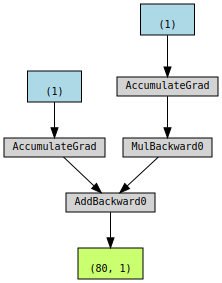

In [10]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()
make_dot(yhat)

In [11]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor

    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [12]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
print('Before: a, b')
print(a,b)
lr = 1e-1
n_epochs = 1000


# pytorch makes actual loss function for us
loss_fn = nn.MSELoss(reduction='mean')

# define sgd optimizer
optimizer = optim.SGD([a,b], lr = lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor

    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward() # no more individua gradient calculation required

    optimizer.step() # no more manual update required
    optimizer.zero_grad() # don't have to make zeros

print(a, b)

Before: a, b
tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [13]:
class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # to make 'a' and 'b' real parameters of the model, we need to wrap them with nn.Paramaters

    self.a = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.b = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  def forward(self, x):

    #computes output
    return self.a + self.b * x

In [14]:
torch.manual_seed(42)

model = ManualLinearRegression().to(device) # our model should be at same device as our data (GPU or CPU)
print(model.state_dict()) # it's parameters

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    model.train()  # setting the model into training mode. Some models may use mechanisms like Dropout, for instance, which have distinct behaviors in training and evaluation phase

    # no more manual prediction
    #yhat = a + b * x_train_tensor
    yhat = model(x_train_tensor)

    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(a, b)

OrderedDict([('a', tensor([0.3367], device='cuda:0')), ('b', tensor([0.1288], device='cuda:0'))])
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [15]:
class LayerLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    # we use a linear layer with single input and single output
    self.linear = nn.Linear(1,1) # here (1,1) represents the size(no of neurons) of previous layer , size in output layer

  def forward(self, x):
    # calling to the layer to make a prediction
    return self.linear(x)

In [16]:
[*LayerLinearRegression().parameters()]

[Parameter containing:
 tensor([[-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([0.2018], requires_grad=True)]

In [17]:
# Alternately we can build a model with calling a class
model = nn.Sequential(nn.Linear(1,1)).to(device)

In [23]:
# generalizing things. if we make one function inside another, we can use this for any mode, lossfunction and optimizer
def make_train_step(model, loss_fn, optimizer):
  # function to perform a step in the train loop
  def train_step(x, y):
    model.train()

    #prediction
    yhat = model(x)

    #loss
    loss = loss_fn(y, yhat)

    # gradient
    loss.backward()

    #update
    optimizer.step()
    optimizer.zero_grad()

    #returns the loss
    return loss.item()

  return train_step # returns the function that will be called inside the train loop

train_step = make_train_step(model, loss_fn, optimizer)
losses = []

for epoch in range(n_epochs):
  loss = train_step(x_train_tensor, y_train_tensor)
  losses.append(loss)

print(model.state_dict())



OrderedDict([('0.weight', tensor([[-0.4869]], device='cuda:0')), ('0.bias', tensor([0.5873], device='cuda:0'))])


In [38]:
from torch.utils.data import Dataset,TensorDataset

# loading as a tensor dataset by out custom function
class CustomDataset(Dataset):
  def __init__(self, x_tensor, y_tensor):
    self.x = x_tensor
    self.y = y_tensor

  # getitem function is used to load data on demand (whenever __getitem__ is called)
  def __getitem__(self, index):
    return (self.x[index], self.y[index])

  def __len__(self):
    return len(self.x)


x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

# this is by pytorch inbuilt class
train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))
(tensor([0.7713]), tensor([2.4745]))


In [39]:
# Dataloader: this class use minibatches to load our dataset. We cannot use batch gradient if we have a very large dataset.
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset = train_data, batch_size = 16, shuffle = True)


In [44]:
lossee = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:
  # the dataset "lives" in the CPU, so do our mini-batches. Therefore, we need to send those mini-batches to the device where the model "lives"
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    loss = train_step(x_batch, y_batch)
    losses.append(loss)

print(model.state_dict())

OrderedDict([('0.weight', tensor([[-0.4869]], device='cuda:0')), ('0.bias', tensor([0.5873], device='cuda:0'))])


In [45]:

from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)
train_dataset, val_dataset = random_split(dataset, [80,20])

train_loader = DataLoader(dataset=train_dataset, batch_size = 16)
val_loader = DataLoader(dataset = val_dataset, batch_size = 16)

In [46]:
losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)
    loss = train_step(x_batch, y_batch)
    losses.append(loss)

    with torch.no_grad():
       for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)

            model.eval()
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

OrderedDict([('0.weight', tensor([[-0.4869]], device='cuda:0')), ('0.bias', tensor([0.5873], device='cuda:0'))])
